In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import data set
df = pd.read_csv('StudentsPerformance.csv')

# Data Overview

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (1000, 8) 

----------------------------------------
Values: 

 [['female' 'group B' "bachelor's degree" ... 72 72 74]
 ['female' 'group C' 'some college' ... 69 90 88]
 ['female' 'group B' "master's degree" ... 90 95 93]
 ...
 ['female' 'group C' 'high school' ... 59 71 65]
 ['female' 'group D' 'some college' ... 68 78 77]
 ['female' 'group D' 'some college' ... 77 86 86]] 

----------------------------------------
Columns: 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

----------------------------------------
Short data analyse: 



,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Students Performance data set')
print()
print (missing_values (df))

Missing Values from Students Performance data set

                             Total  Percent
writing score                    0      0.0
reading score                    0      0.0
math score                       0      0.0
test preparation course          0      0.0
lunch                            0      0.0
parental level of education      0      0.0
race/ethnicity                   0      0.0
gender                           0      0.0


In [7]:
#create funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93


In [8]:
#create funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  
0                    none  
1               completed  
2                    none  


In [9]:
df_num= df.drop(categoric_df, axis = 1)
df_num.head(3)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93


# Exploratory Data Analysis

(3.5, -0.5)

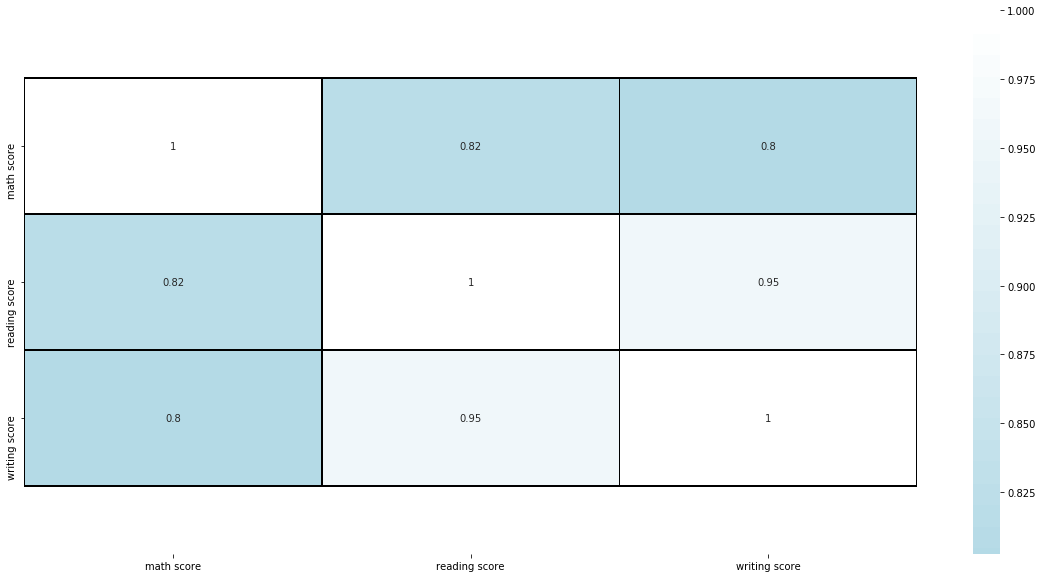

In [10]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='ocean',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [11]:
num_cols= [col_name for col_name in df_num]
len(num_cols)

3

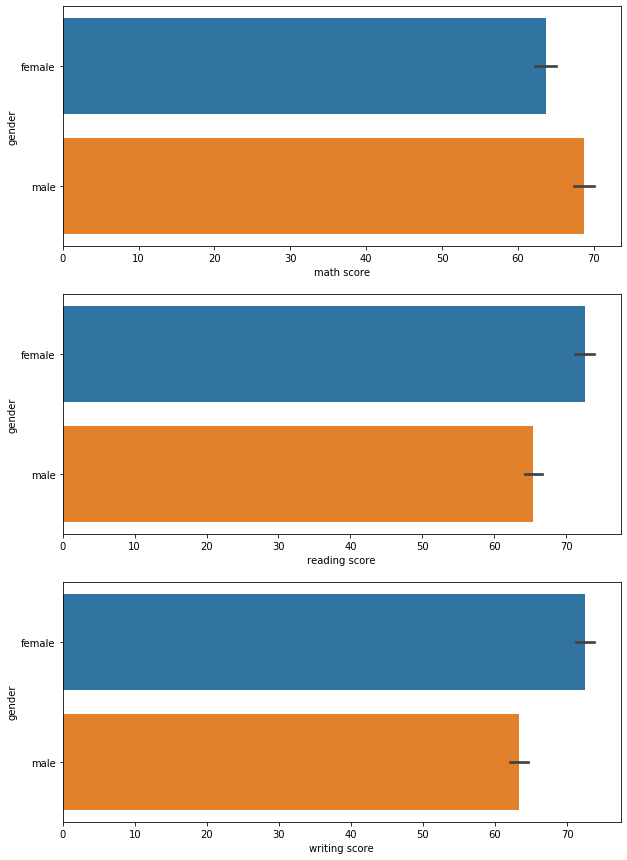

In [12]:
# Let see some visualisation of features

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
start = 0
for j in range(3):
    for i in range(1):
        if start == len(num_cols):
            break
        sns.barplot(x=num_cols[start],
                    y='gender', data=df, ax=ax[j])
        start += 1

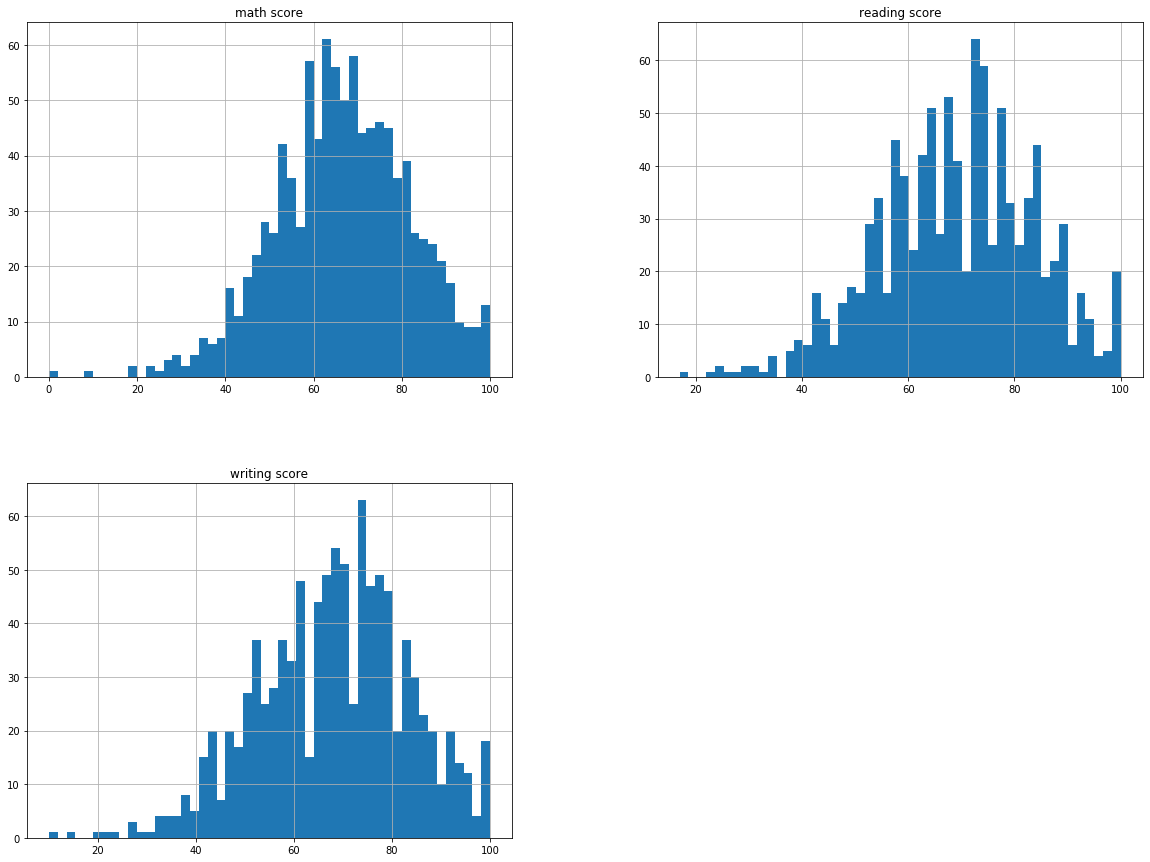

In [13]:
# Let's plot some histograms to have a previzualisation of some of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

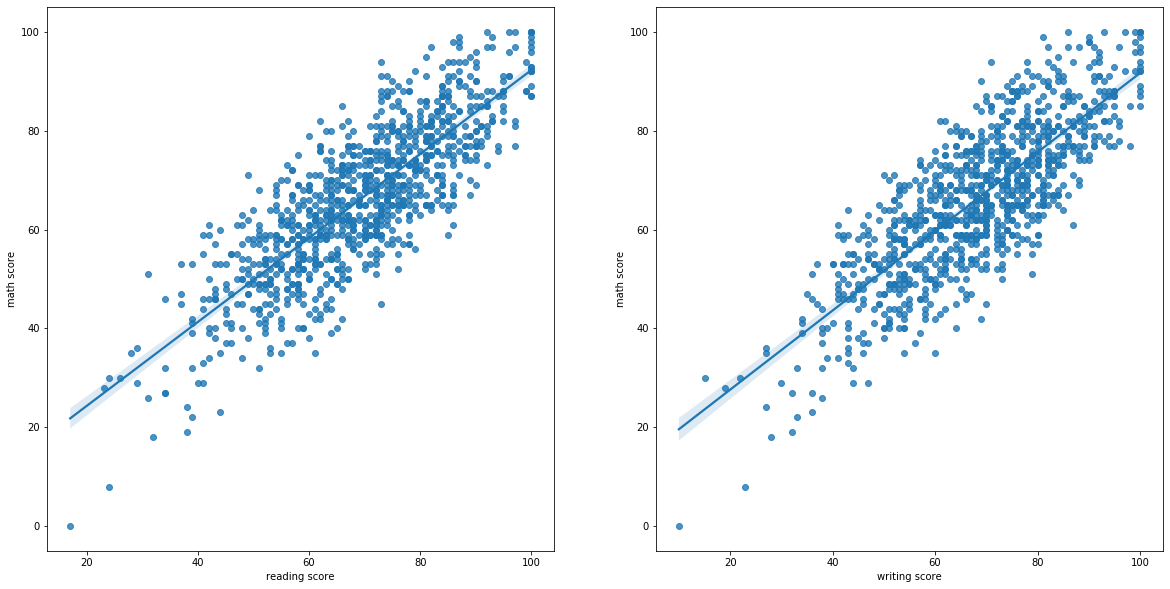

In [14]:
plain_features = ['reading score', 'writing score']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
start = 0
for j in range(1):
    for i in range(2):
        if start == len(plain_features):
            break
        sns.regplot(x=plain_features[start],
                    y='math score', data=df, ax=ax[i])
        start += 1

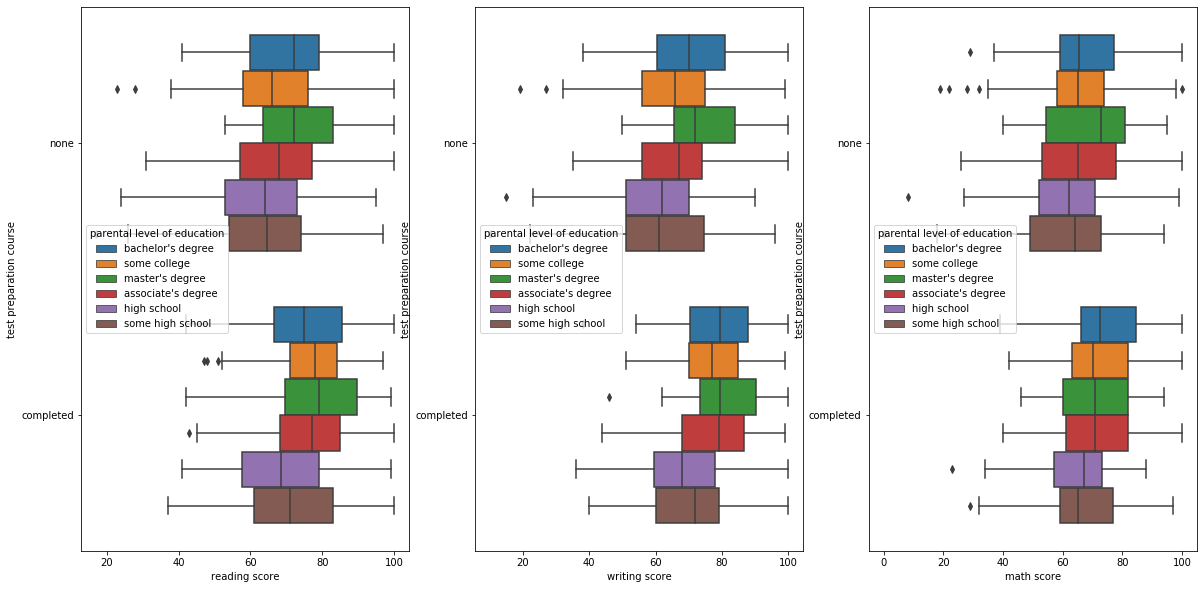

In [15]:
plain_features = ['reading score', 'writing score', 'math score']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
start = 0
for j in range(1):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.boxplot(x=plain_features[start],
                    y='test preparation course', data=df, hue='parental level of education', ax=ax[i])
        start += 1

# PREPROCESING

In [16]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
lab_enc = LabelEncoder()
display(df.head(3))
df2['gender_lab'] = lab_enc.fit_transform(df2['gender'].values)
df2['tpc_lab'] = lab_enc.fit_transform(df2['test preparation course'].values)
print()
print('After transforming gender and test preparation course \n')
df2.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93



After transforming gender and test preparation course 



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_lab,tpc_lab
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,0
2,female,group B,master's degree,standard,none,90,95,93,0,1


In [17]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df2.loc[:,['race/ethnicity']])
df_enc = pd.DataFrame(ohe.transform(df2.loc[:, ['race/ethnicity']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [18]:
ohe.fit(df2.loc[:, ['parental level of education']])
df_enc1 = pd.DataFrame(ohe.transform(df2.loc[:, ['parental level of education']]).toarray(), columns=ohe.get_feature_names())
df_enc1.head(5)

,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
df_train = pd.concat([df2, df_enc, df_enc1], axis=1)
df_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_lab,tpc_lab,...,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df_train.shape

(1000, 21)

In [21]:
df_train.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
gender_lab                     0
tpc_lab                        0
x0_group A                     0
x0_group B                     0
x0_group C                     0
x0_group D                     0
x0_group E                     0
x0_associate's degree          0
x0_bachelor's degree           0
x0_high school                 0
x0_master's degree             0
x0_some college                0
x0_some high school            0
dtype: int64

In [22]:
df_train.drop(['lunch', 'parental level of education', 'test preparation course', 'race/ethnicity','gender'], axis=1)

,math score,reading score,writing score,gender_lab,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,72,72,74,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,90,88,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90,95,93,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,57,44,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,78,75,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,62,55,55,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,59,71,65,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,68,78,77,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
X = df_train.drop(['lunch', 'parental level of education', 'test preparation course', 'race/ethnicity','gender', 'math score'], axis = 1)
y = df_train['math score']
display(X.head(5))
display(y)

,reading score,writing score,gender_lab,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,72,74,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,90,88,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,95,93,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,57,44,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,78,75,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [24]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 15)
y_train shape: (800,)
X_test shape: (200, 15)
y_test shape: (200,)


In [26]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [27]:
# transform testing dataabs
X_test_norm = norm.transform(X_test)
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,reading score,writing score,gender_lab,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.734940,0.700000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.746988,0.800000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.469880,0.477778,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


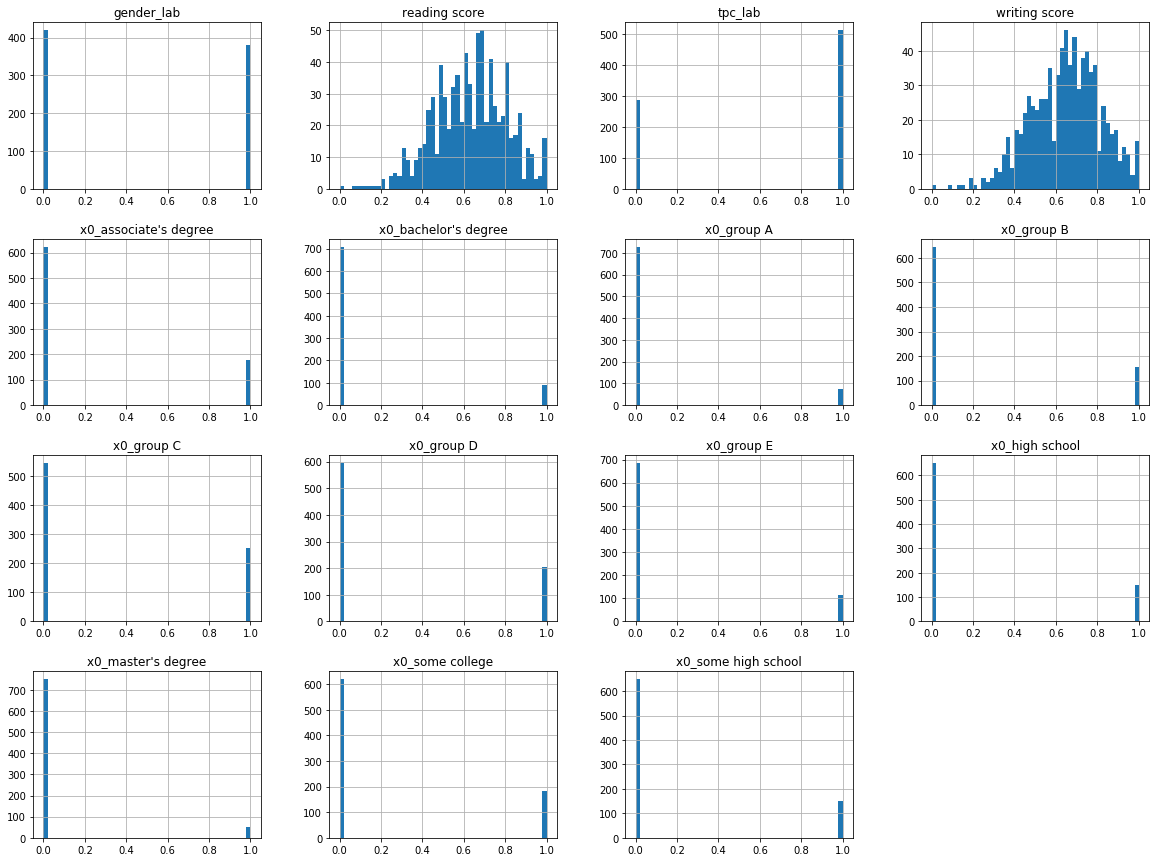

In [28]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
col_names = list(X.columns)
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,reading score,writing score,gender_lab,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.591958,0.313452,1.048684,0.750000,-0.314485,-0.488252,-0.682057,1.703655,-0.409736,1.876106,-0.358259,-0.478413,-0.258199,-0.540747,-0.484322
1,0.660771,0.905803,-0.953576,0.750000,-0.314485,-0.488252,-0.682057,1.703655,-0.409736,-0.533019,-0.358259,-0.478413,3.872983,-0.540747,-0.484322
2,-0.921914,-1.002883,1.048684,-1.333333,-0.314485,-0.488252,-0.682057,-0.586973,2.440599,1.876106,-0.358259,-0.478413,-0.258199,-0.540747,-0.484322


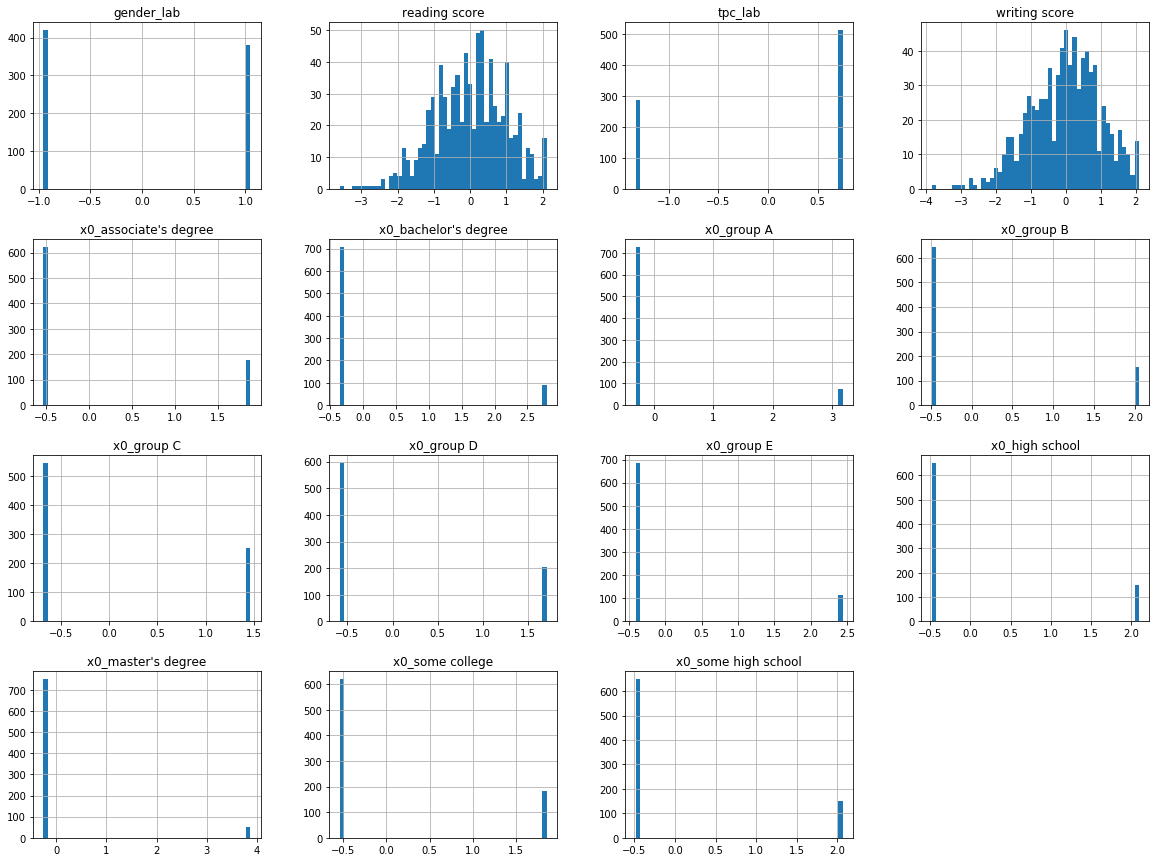

In [30]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [31]:
# Import  mean_squere_error and mea_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [32]:
MSE = {}
MAE = {}
RMSE={}

In [33]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MSE[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean_squared_error of {model_name}: {MSE[model_name]}\n")
    RMSE[model_name]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE: {RMSE[model_name]}\n')
    MAE[model_name]=mean_absolute_error(y_test,y_pred)              
    print(f'Mean_absolute_error: {MAE[model_name]}\n')
    return model, y_pred

In [34]:
# First model LinearRegression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model1 = models(lin_reg, X_train_std, y_train, X_test_std, y_test, 'Lin_reg')

Mean_squared_error of Lin_reg: 34.04472096735815

RMSE: 5.834785425991101

Mean_absolute_error: 4.666350809106422



In [35]:
# Second model SVC kernel linear

from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model2 = models(svr_linear, X_train_std, y_train, X_test_std, y_test, 'Svr_linear')

Mean_squared_error of Svr_linear: 33.915719748777725

RMSE: 5.823720438755429

Mean_absolute_error: 4.683146327269148



In [36]:
# Third model SVR_rbf

SVR_rbf = SVR()
model3 = models(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Mean_squared_error of SVR_rbf: 65.39642317820292

RMSE: 8.086805498971946

Mean_absolute_error: 6.376222735550218



In [37]:
# Forth model RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
Ran_for_reg = RandomForestRegressor()
model4 = models(Ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'Ran_for_reg')

Mean_squared_error of Ran_for_reg: 33.65252688736111

RMSE: 5.8010798035677045

Mean_absolute_error: 4.715635833333334



Text(0, 0.5, 'Testing Accuracy')

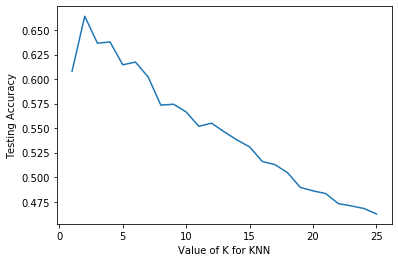

In [38]:
# Fifth model KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [39]:
# 5th model KNeighborsRegressor
KNN = KNeighborsRegressor()
model4 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')

Mean_squared_error of KNN: 87.3434

RMSE: 9.345769096227448

Mean_absolute_error: 7.571000000000001



In [40]:
# 6th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model5 = models(xg_reg, X_train_std, y_train, X_test_std, y_test, 'Xg_reg')

Mean_squared_error of Xg_reg: 641.6946980534123

RMSE: 25.331693548861125

Mean_absolute_error: 23.062137527465822



In [41]:
# 7th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model7= models(dec_tree_reg, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_reg')

Mean_squared_error of Dec_tree_reg: 58.60125

RMSE: 7.655145328470257

Mean_absolute_error: 6.1225



In [42]:
# 8th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)

model8= models(bag_reg_extra_tree, X_train_std, y_train, X_test_std, y_test, 'Bag_reg_extra_tree')

Mean_squared_error of Bag_reg_extra_tree: 41.4905345

RMSE: 6.441314656186266

Mean_absolute_error: 5.2528500000000005



In [43]:
#9th model RANSACRegressor

from sklearn.linear_model import RANSACRegressor

ransa = RANSACRegressor()

model9= models(ransa, X_train_std, y_train, X_test_std, y_test, 'Ransa')

Mean_squared_error of Ransa: 36.645427823027106

RMSE: 6.053546714367298

Mean_absolute_error: 4.865676042286438



In [44]:
#10th model lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

model10= models(lasso, X_train_std, y_train, X_test_std, y_test, 'Lasso')

Mean_squared_error of Lasso: 37.84429582663624

RMSE: 6.1517717632106805

Mean_absolute_error: 4.916352153362173



In [45]:
# Lets see the results of models of MSE
df_MSE = pd.DataFrame({'Models': list(MSE.keys()),
                          'MSE': list(MSE.values())})
df_MSE

,Models,MSE
0,Lin_reg,34.044721
1,Svr_linear,33.915720
2,SVR_rbf,65.396423
3,Ran_for_reg,33.652527
4,KNN,87.343400
5,Xg_reg,641.694698
6,Dec_tree_reg,58.601250
7,Bag_reg_extra_tree,41.490535
8,Ransa,36.645428
9,Lasso,37.844296


[Text(0, 0.5, 'MSE')]

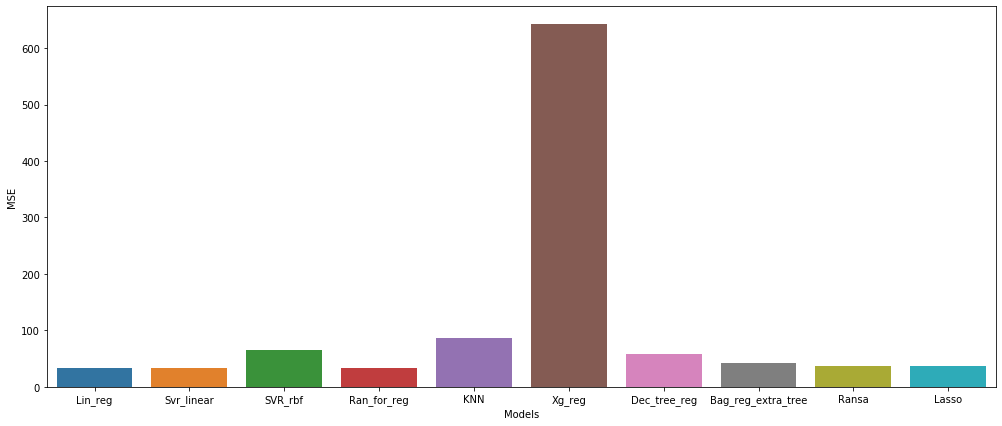

In [46]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MSE", data = df_MSE)
ax.set(ylabel = "MSE")

In [47]:
# Model with the smalest error
print(f"The model with the smallest Mean_square_error is {min(MSE, key=MSE.get)} and it's error is {MSE[min(MSE, key=MSE.get)]}")

The model with the smallest Mean_square_error is Ran_for_reg and it's error is 33.65252688736111


In [48]:
# Lets see the results of models of MAE
df_MAE = pd.DataFrame({'Models': list(MAE.keys()),
                          'MAE': list(MAE.values())})
df_MAE

,Models,MAE
0,Lin_reg,4.666351
1,Svr_linear,4.683146
2,SVR_rbf,6.376223
3,Ran_for_reg,4.715636
4,KNN,7.571000
5,Xg_reg,23.062138
6,Dec_tree_reg,6.122500
7,Bag_reg_extra_tree,5.252850
8,Ransa,4.865676
9,Lasso,4.916352


In [49]:
# Model with the smalest mean absolut error
print(f"The model with the smallest Mean_absolut_error is {min(MAE, key=MAE.get)} and it's error is {MAE[min(MAE, key=MAE.get)]}")

The model with the smallest Mean_absolut_error is Lin_reg and it's error is 4.666350809106422


In [50]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
993,62,67.64
859,87,65.60
298,40,56.48
553,77,63.20
672,69,66.84


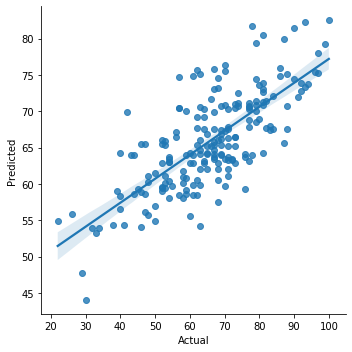

In [51]:
ax = sns.lmplot(x="Actual", y="Predicted", data=df_check)


# THE END